In [ ]:
import MDAnalysis as md
import matplotlib.pyplot as plt
import numpy as np
import cyltransf as ct # Made Functions
import time # For benchmarking

file_dir = "data"

u = md.Universe(file_dir + "/md_1.tpr", file_dir + "/md_1_noPBC.xtc")
u_gro = md.Universe(file_dir + '/md_1.gro')
u.trajectory[-1]
prot = u.select_atoms("protein")
xd, yd, zd = u.trajectory[-1].dimensions[0:3]/10

t_eq = 20000 # ps
# Time Data
ti = u.trajectory[0].time
tf = u.trajectory[-1].time
nt = len(u.trajectory)-1
deltat = (tf-ti)/nt
t = np.linspace(ti,tf,nt+1)
maskt = (t >= t_eq)

In [ ]:
def mean_fib_coords_generation(universe, protein, mask):
    # Whole Protein
    mean_coords = None
    box_mean = None
    # Mean
    for ts in universe.trajectory[mask]:
        coords = universe.select_atoms("all").positions
        if mean_coords is None:
            mean_coords = coords.astype(float)
            box_mean = ts.dimensions.astype(np.float64, copy=True)
            n = 1
        else:
            n += 1
            mean_coords += (coords - mean_coords) / n
            box_mean += (ts.dimensions - box_mean) / n

    new_u = universe.copy()
    new_u.atoms.positions = mean_coords
    new_u.dimensions = box_mean

    return new_u

In [ ]:
u_mean = mean_fib_coords_generation(u, u_gro, prot, maskt)

with md.Writer(file_dir + "fibril_mean.pdb") as pdb:
    pdb.write(u_mean)

with md.Writer(file_dir + 'fibril_mean.xtc', n_atoms=u_mean.atoms.n_atoms) as W:
    W.write(u_mean.atoms) 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'chainIDs' Using default value of ''
  warnings.warn("Found no information for attr: '{}'"
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  warnings.warn("Found no information for att

In [75]:
u_read = md.Universe(file_dir + "/md_1.tpr", file_dir + "/fibril_mean.xtc")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/MDAnalysis/coordinates/XDR.py:253: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn(


In [76]:
print("Bonds in reloaded PDB:", len(u_read.bonds))
print("Bonds in Original:", len(u.bonds))

Bonds in reloaded PDB: 1327931
Bonds in Original: 1327931


In [77]:
fragments_umean = u_read.select_atoms("protein").fragments
mol = 2
chains = fragments_umean[3*mol: 3*mol + 3]
colmol = chains[0] + chains[1] + chains[2]

In [78]:
len(fragments_umean)

123

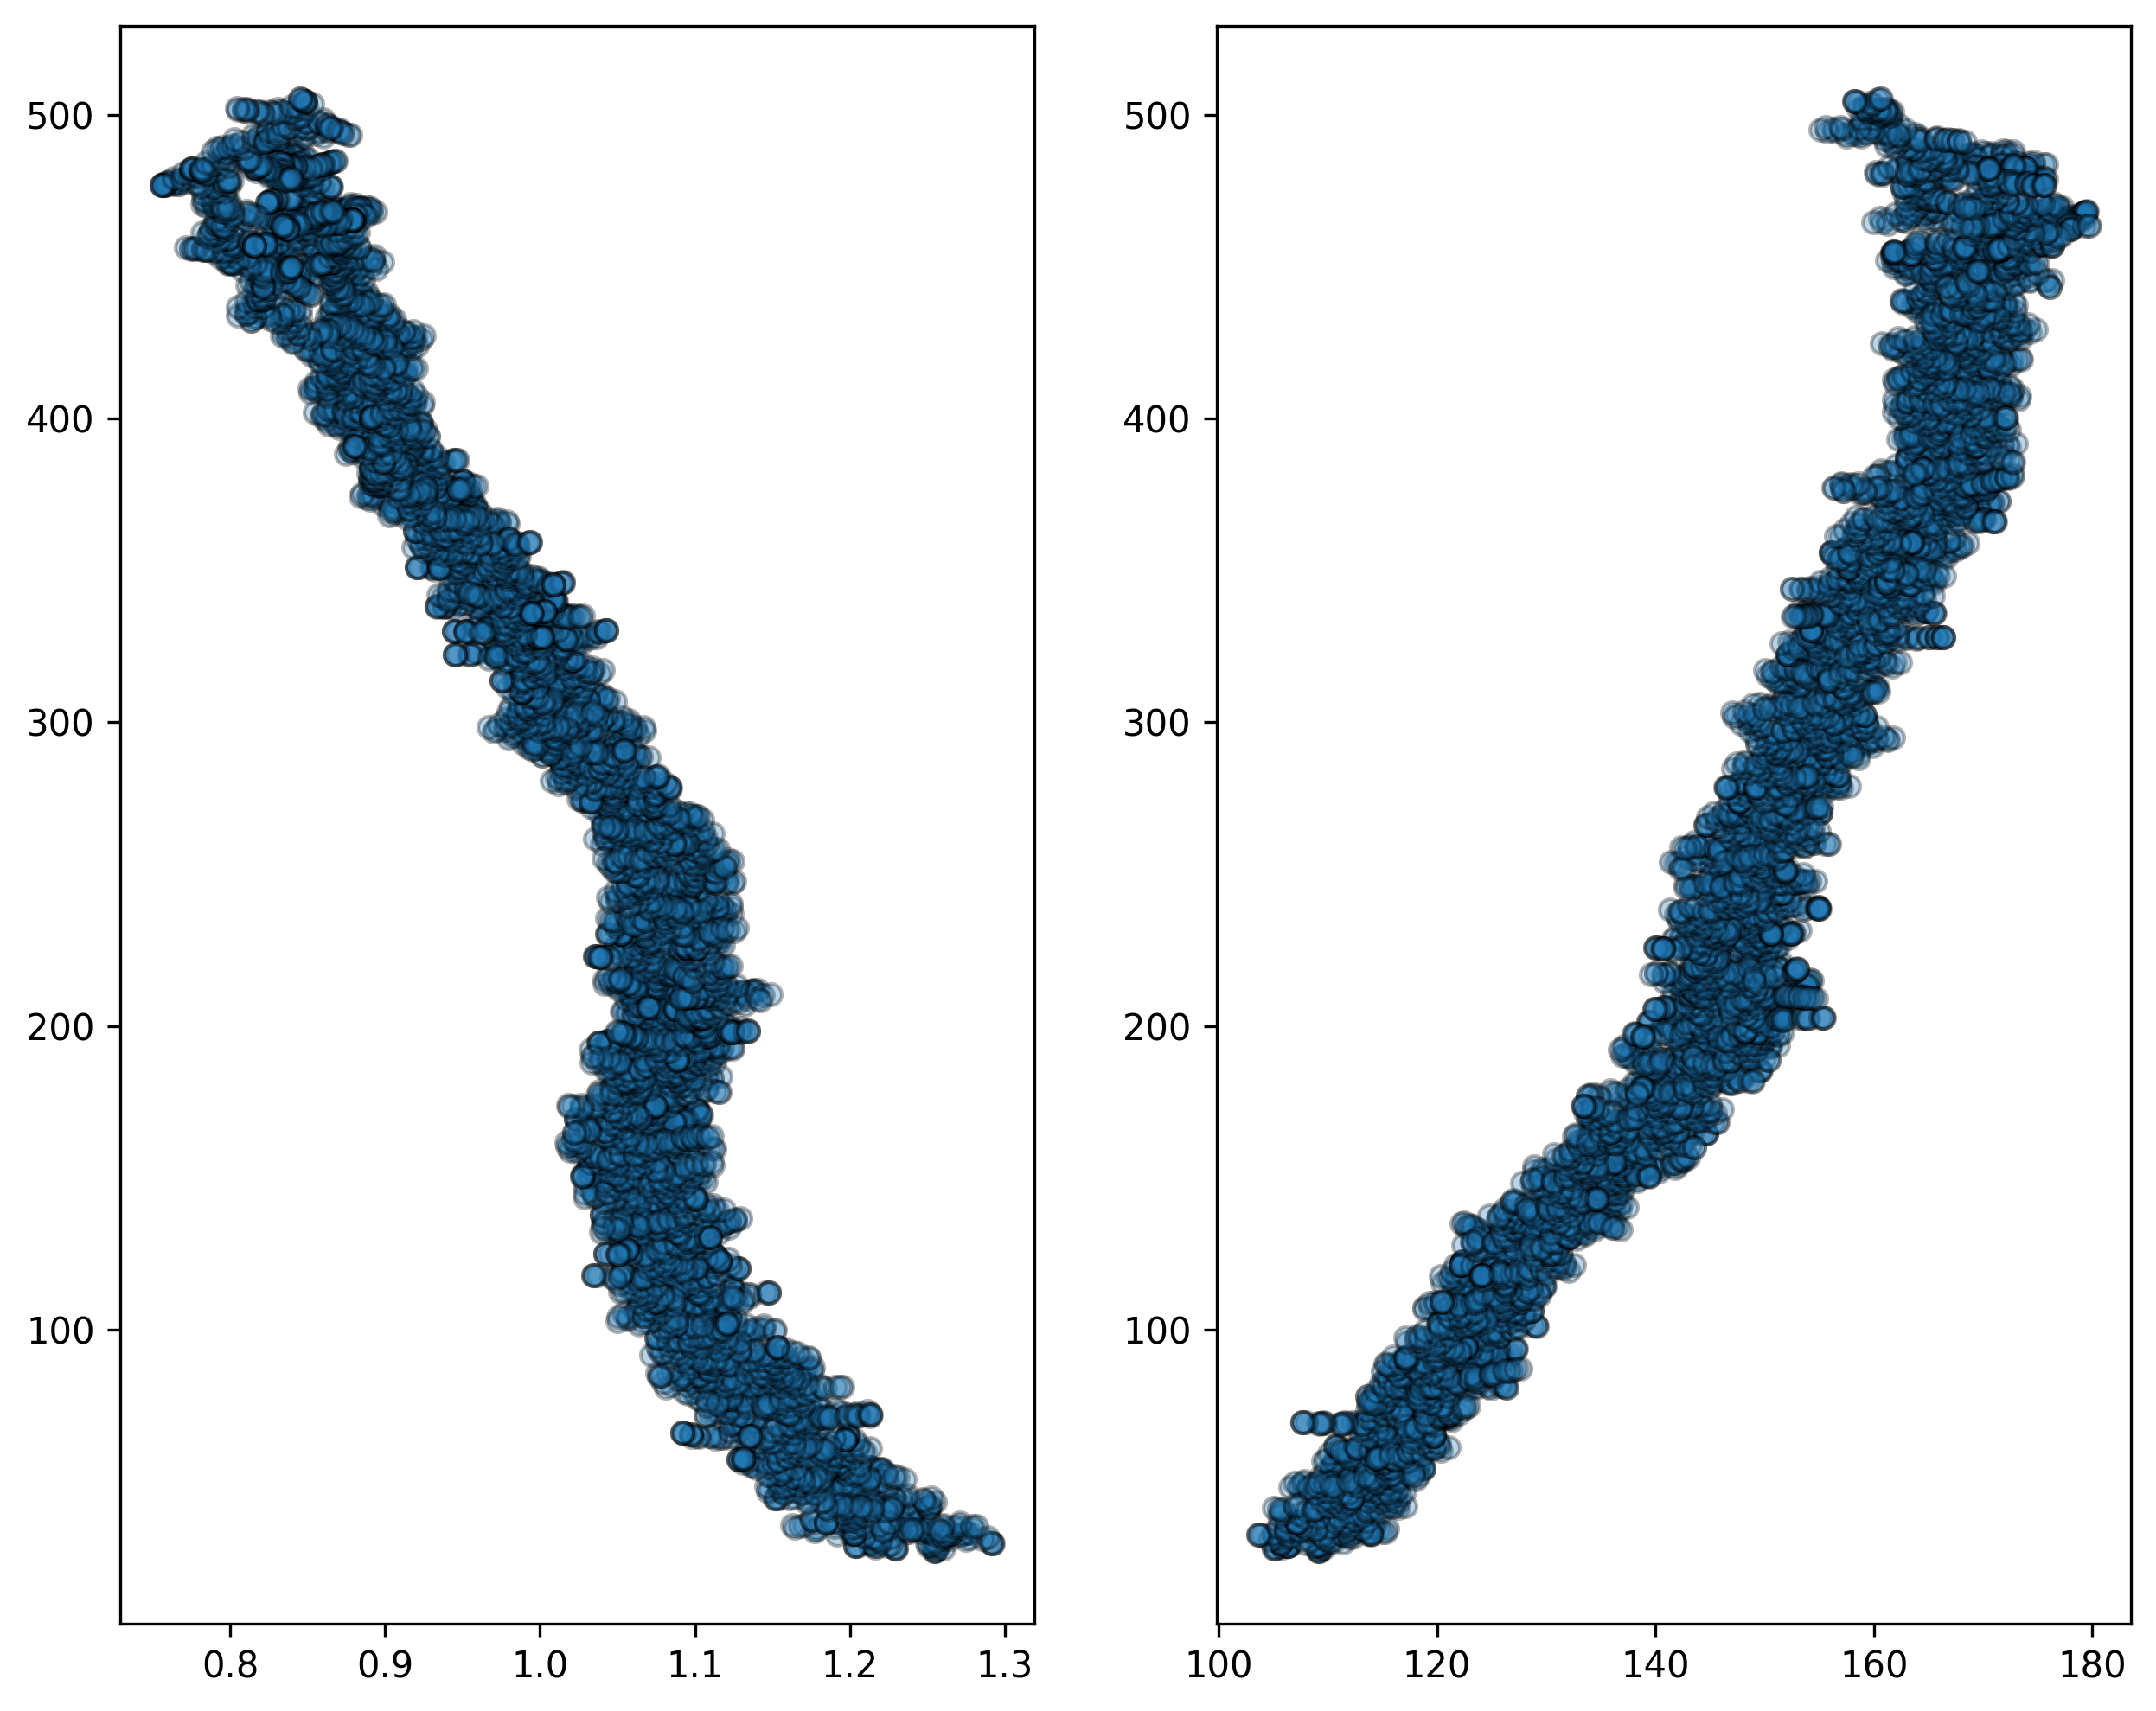

In [79]:
rad_mol, phi_mol, z_mol = ct.cyl_proj(colmol.positions)
fig, ax = plt.subplots(1,2, figsize=(10,8), dpi=300)

ax[0].scatter(phi_mol, z_mol, alpha=0.3, edgecolor='k', label='CA Atoms')
ax[1].scatter(rad_mol, z_mol, alpha=0.3, edgecolor='k', label='CA Atoms')

plt.show()

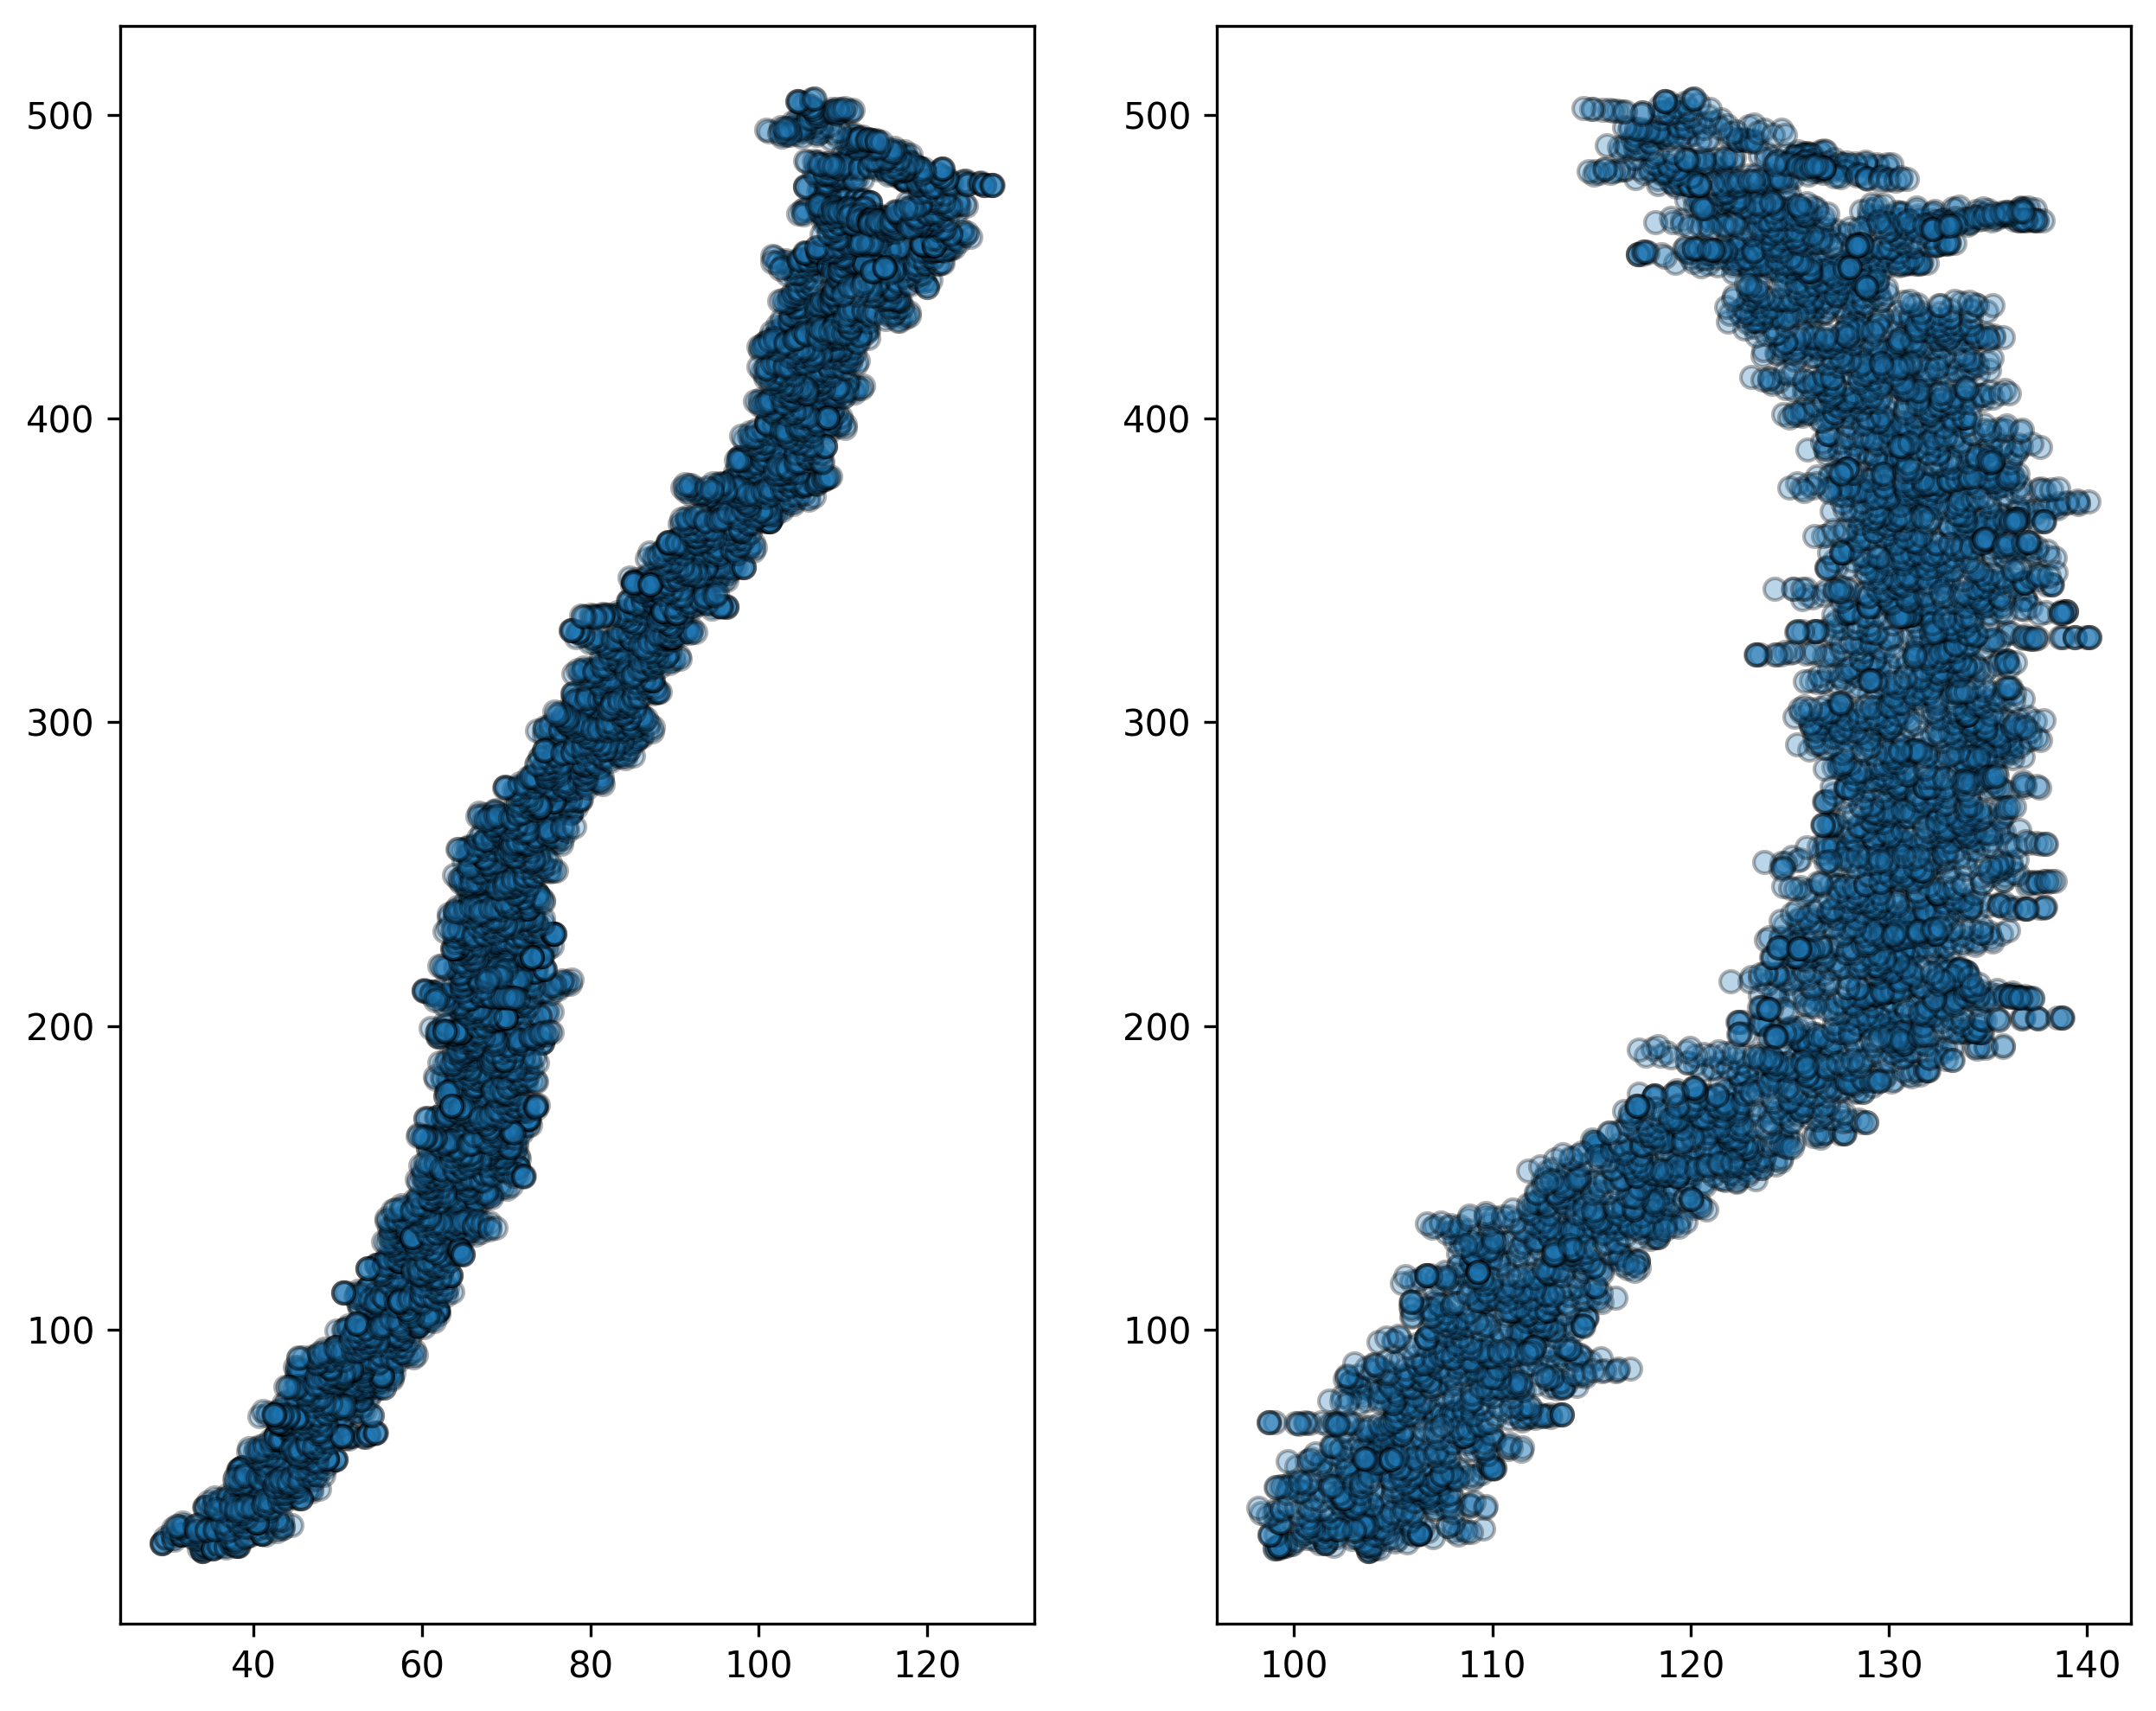

In [80]:
fig, ax = plt.subplots(1,2, figsize=(10,8), dpi=300)

ax[0].scatter(colmol.positions[:, 0], colmol.positions[:, 2], alpha=0.3, edgecolor='k', label='CA Atoms')
ax[1].scatter(colmol.positions[:, 1], colmol.positions[:, 2], alpha=0.3, edgecolor='k', label='CA Atoms')

plt.show()